In [1]:
# Use hl as the standard abbreviation for the HamlinLab library
import hamlinlab as hl

import numpy as np # various numerical stuff with a useful array data structures
import pandas as pd # This is kind of like excel for python
import matplotlib.pyplot as plt # Standard plotting library
from scipy.optimize import curve_fit # General non-linear curve fitting

In [2]:
# This makes plots interactive (i.e. zoomable, etc).
%matplotlib widget

# These lines make it so that any imported libraries
# are automatically reloaded if they are updated.
# This is useful if you are keeping parts of your code
# in a seperate .py file, and are actively modifying that
# .py file while using it in jupyter-lab
# E.g. see the hl.example.hello() example below for code stored
# in an external module.
%load_ext autoreload
%autoreload 2

In [11]:
filename = '0395_Mn5_220709.dc.dat'
filepath = hl.raw_data_dir / filename

pathlib.PosixPath

In [152]:
from dataclasses import dataclass, field
import pathlib
import typing
import re

@dataclass
class SquidFile:
    '''
    Class for keeping track of MPMS data taken during the 2022 summer REU program.
    '''
    filepath: typing.Union[str, pathlib.Path]
    df: pd.DataFrame = field(init=False, repr=False)
    weight: float = field(init=False)
    name: str = field(init=False)
    zfcw: pd.DataFrame = field(init=False, repr=False)
    fcw: pd.DataFrame = field(init=False, repr=False)
    mh: pd.DataFrame = field(init=False, repr=False)
    
    def __find_header_lines(self):
        '''
        Find how many lines are in the file before '[Data]'.
        I.e how many lines comprise the header.
        '''

        with open(self.filepath, mode='r') as f:
            lines = f.readlines()

        strip_lines = [line.strip() for line in lines]
        for i, line in enumerate(strip_lines):
            if line == '[Data]':
                break

        return i+1
    
    def __extract_df(self):
        rows_to_skip = self.__find_header_lines()
        mydf = pd.read_csv(self.filepath, skiprows=rows_to_skip)
        mydf['Date'] = pd.to_datetime(mydf['Time'], unit='s')
        mydf['Temp'] = mydf['Temperature (K)']
        mydf['chi'] = mydf['Long Moment (emu)'] / mydf['Field (Oe)'] 
        return mydf
    
    def __extract_weight(self):
        with open(self.filepath, mode='r') as f:
            lines = f.readlines()

        weight = 0
        strip_lines = [line.strip() for line in lines]
        for line in strip_lines:
            match = re.search("INFO, WEIGHT, ([0-9]*.[0-9]*)", line)
            if match:
                weight = float(match.group(1))
                break

        return weight
    
    def __extract_name(self):
        with open(self.filepath, mode='r') as f:
            lines = f.readlines()

        name = ''
        strip_lines = [line.strip() for line in lines]
        for line in strip_lines:
            match = re.search("INFO, NAME, (.*)$", line)
            if match:
                name = match.group(1)
                break

        return name
    
    def __post_init__(self):
        self.df = self.__extract_df()
        self.weight = self.__extract_weight()
        self.name = self.__extract_name()
        self.zfcw = self.df[0:40]
        self.fcw = self.df[40:80]
        self.mh = self.df[80:]

Text(0.5, 1.0, '0395_Mn')

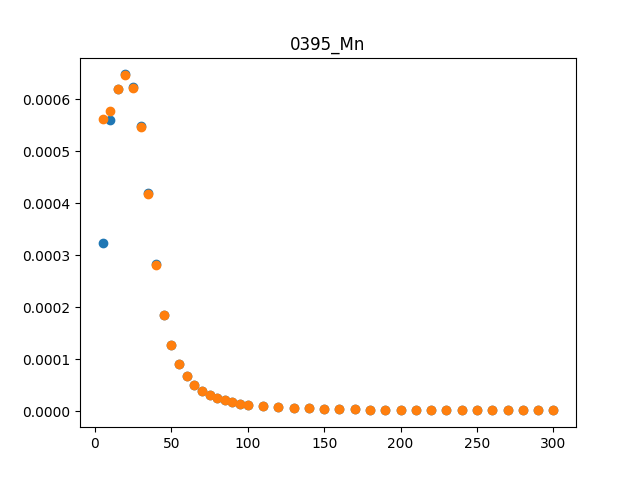

In [153]:
sf = SquidFile(hl.raw_data_dir / '0395_Mn5_220709.dc.dat')

fig, ax = plt.subplots()
ax.plot(sf.zfcw['Temp'], sf.zfcw['chi'], 'o')
ax.plot(sf.fcw['Temp'], sf.fcw['chi'], 'o')
ax.set_title(sf.name)

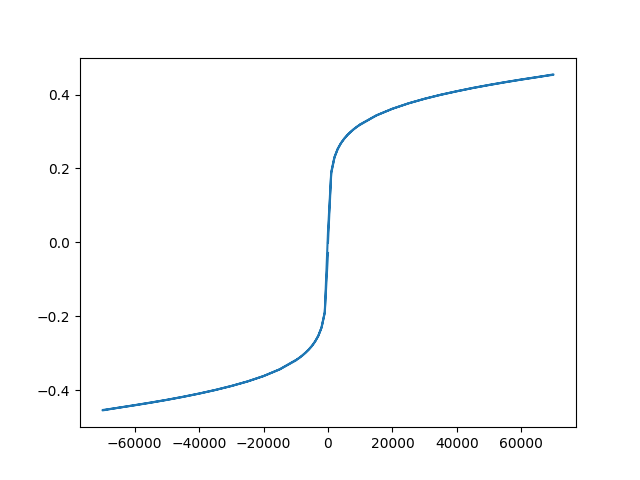

In [154]:
fig, ax = plt.subplots()
ax.plot(sf.mh['Field (Oe)'], sf.mh['Long Moment (emu)'])

In [219]:
# @dataclass(frozen=True)
@dataclass
class Imute():
    name: str
    number: float
    
    @property
    def lucky(self):
        return f'{self.name} your lucky number is {self.number}'
    
    @property
    def orisit(self):
        return self.lucky + '... or is it!?'
    
    @property
    def mylist(self):
        return [1, 2]
    
foo = Imute('James', 7)
print(foo.mylist)
foo.mylist.append(0)
print(foo.mylist)

[1, 2]
[1, 2]


In [220]:
mylist = [1, 2]
mylist.append(3)
mylist

[1, 2, 3]